In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

from keras.models import Sequential
from keras.layers import Dense

from datetime import datetime

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def assessment(data, y_feature, x_feature, index=-1):
    if index >= 0:
        data['color'] = np.where(data.index == index, 'r', 'g')
        hue = 'color'
    else:
        hue = None

    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    
    # Distribution plot
    sns.histplot(data[x_feature], kde=False, color='g', ax=axes[0])
    axes[0].set_xlabel(x_feature, fontsize=10)
    
    # Scatter plot
    if index >= 0:
        axes[1].scatter(data[x_feature], data[y_feature], c=data['color'], edgecolors='w')
    else:
        sns.scatterplot(x=x_feature, y=y_feature, data=data, hue=hue, legend=False, ax=axes[1])
    axes[1].set_xlabel(x_feature, fontsize=10)
    axes[1].set_ylabel(y_feature, fontsize=10)
    
    plt.show()

def correlation_map(data, feature, number):
    numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
    most_correlated = numeric_data.corr().nlargest(number, feature)[feature].index
    correlation = numeric_data[most_correlated].corr()
    
    mask = np.triu(np.ones_like(correlation, dtype=bool))
    
    plt.figure(figsize=(20, 10))
    sns.heatmap(correlation, mask=mask, vmin=-1, vmax=1, square=True, 
                center=0, annot=True, annot_kws={"size": 8}, cmap="PRGn")
    plt.show()


In [37]:
sns.set()
start_time = datetime.now()

data = pd.read_csv('smart-grid.csv')

map1 = {'unstable': 0, 'stable': 1}
data['stabf'] = data['stabf'].replace(map1)

data = data.sample(frac=1)

In [38]:
data.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
30650  9.882386  4.897325  0.976995  9.985644  4.774047 -1.342706 -1.552404   
3139   5.495708  5.049364  1.900232  1.145262  3.426656 -0.784128 -0.800214   
22747  6.878462  8.509816  3.404691  9.900298  4.159822 -1.263602 -1.905540   
14457  5.243158  0.979208  7.397696  1.475855  4.005701 -1.172465 -1.721691   
24761  9.050176  0.513509  4.938294  4.330449  4.019484 -0.917999 -1.278126   

             p4        g1        g2        g3        g4      stab  stabf  
30650 -1.878938  0.479436  0.725861  0.370579  0.091542 -0.013772      1  
3139  -1.842313  0.170864  0.581829  0.257750  0.204845 -0.047143      1  
22747 -0.990680  0.624203  0.540370  0.411861  0.207251  0.031491      0  
14457 -1.111545  0.662019  0.565383  0.634696  0.496058 -0.009945      1  
24761 -1.823358  0.520015  0.351849  0.685148  0.798614  0.019500      0

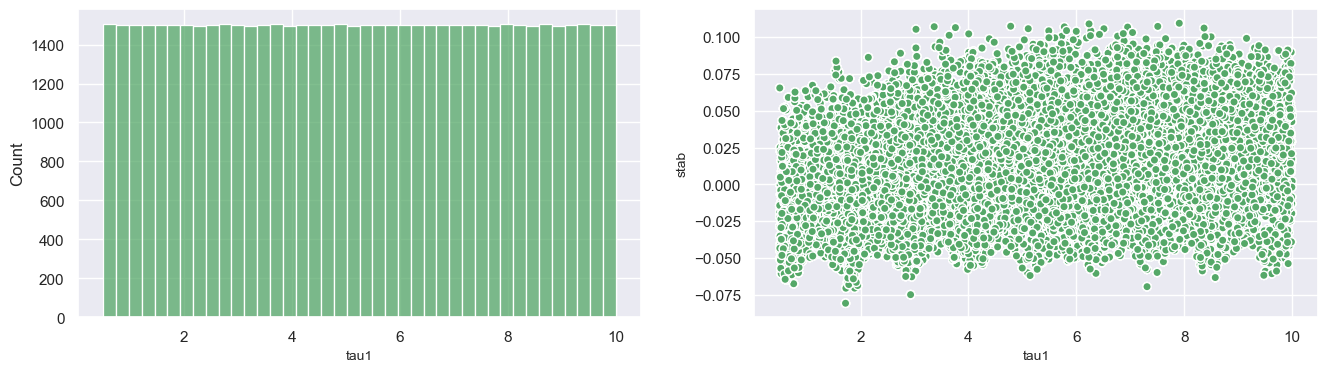

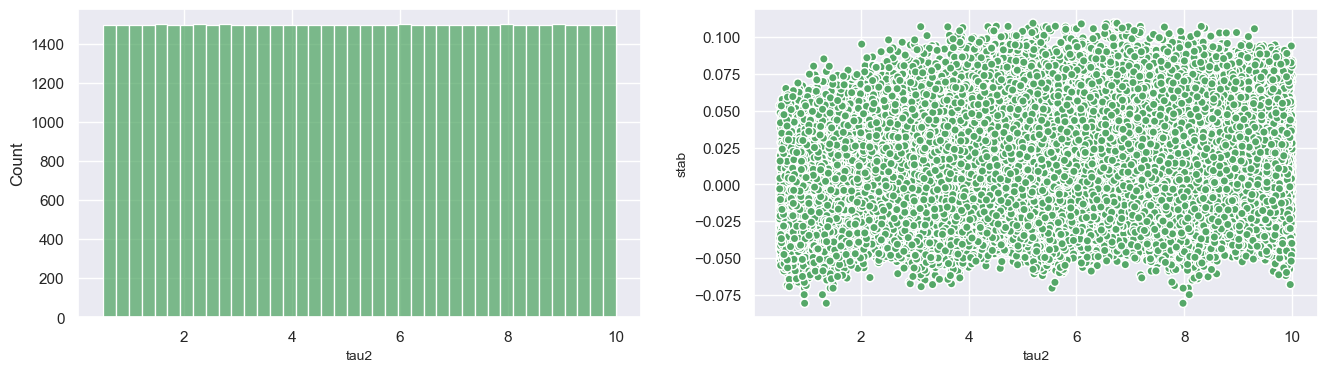

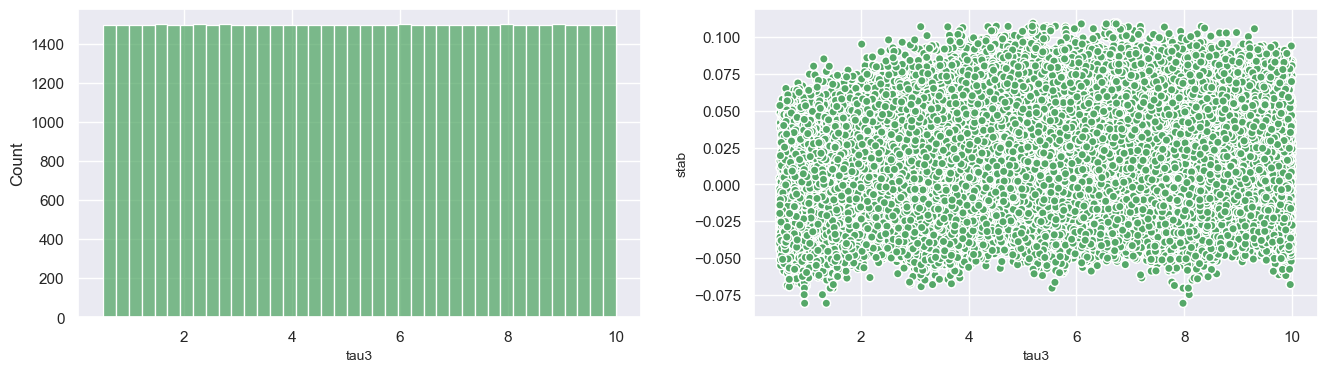

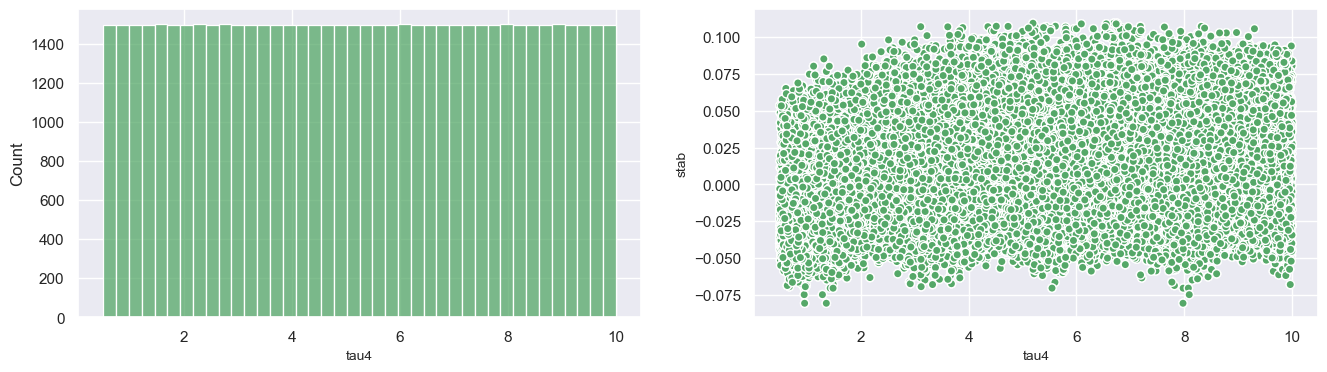

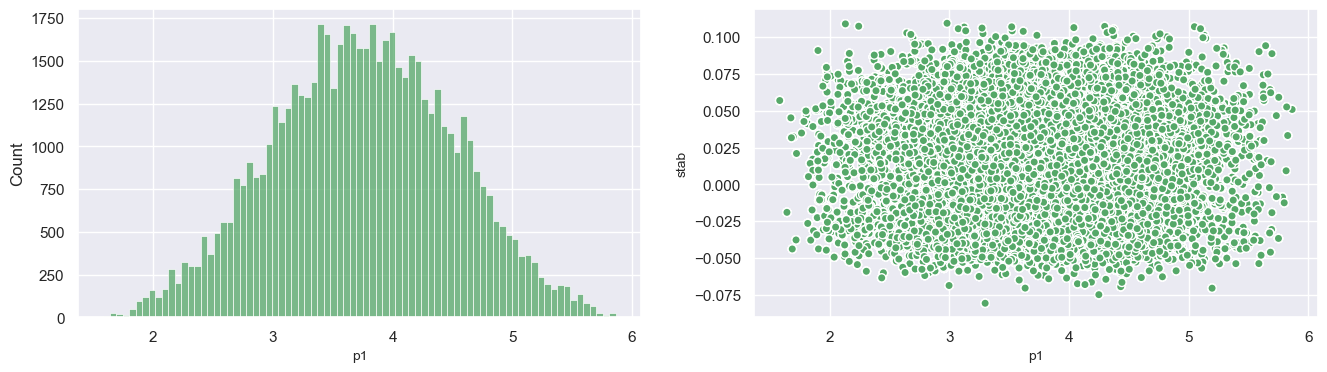

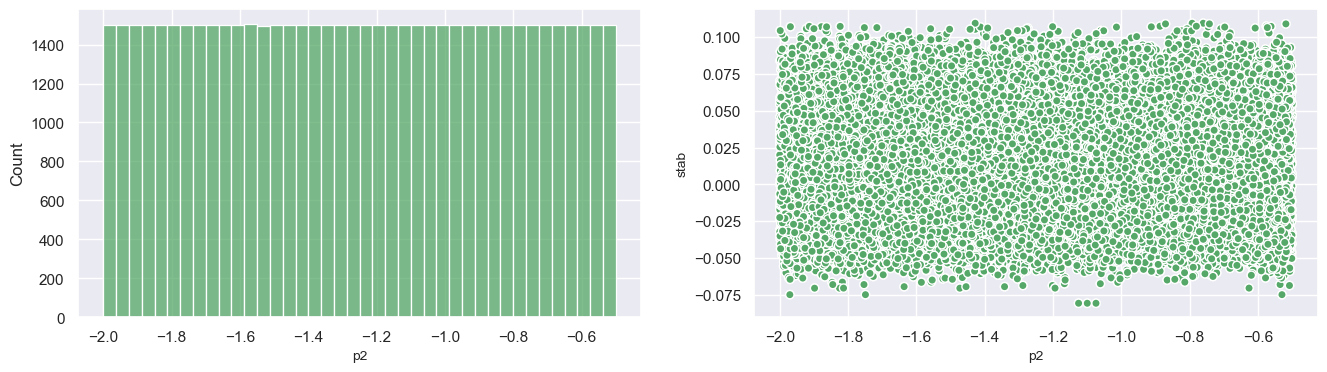

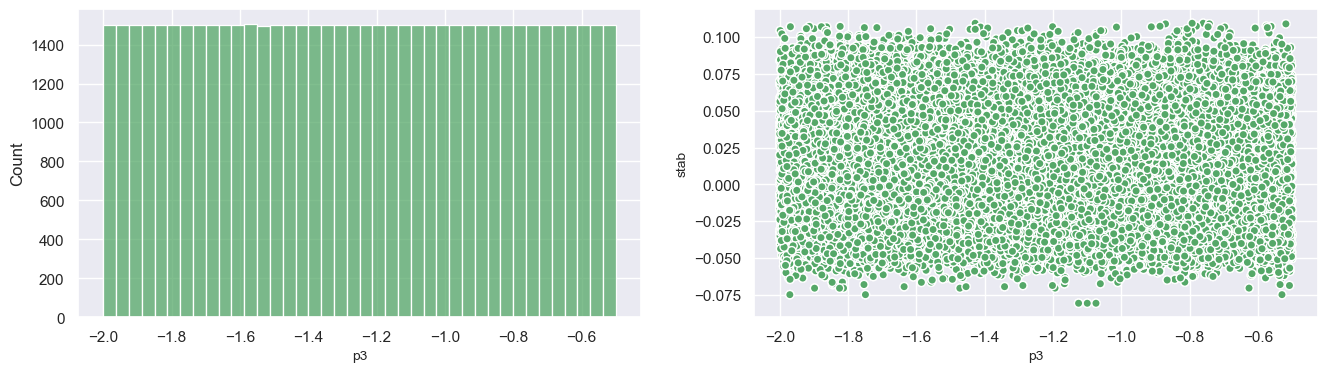

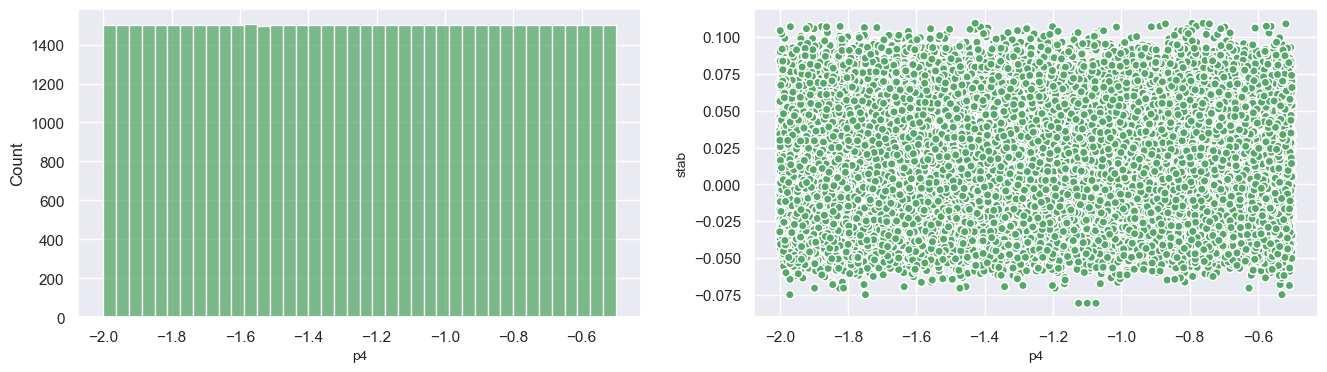

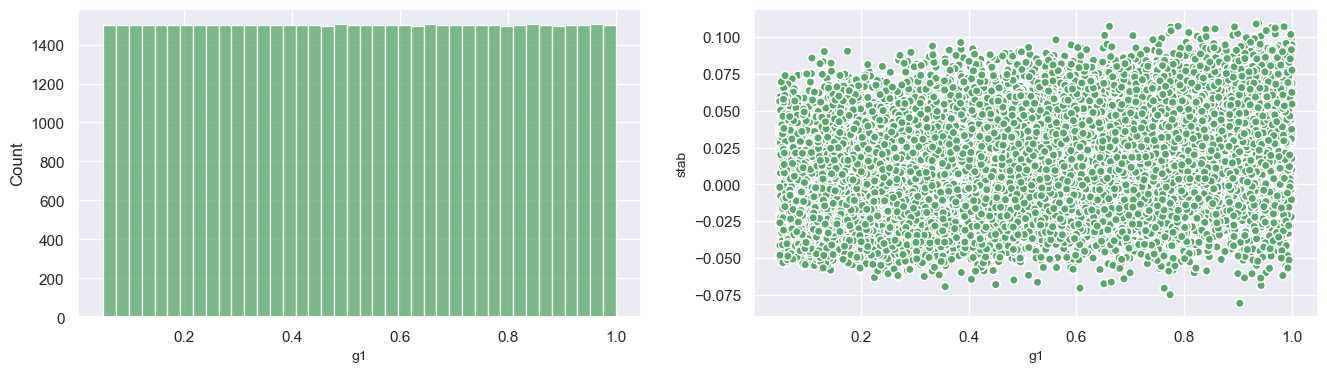

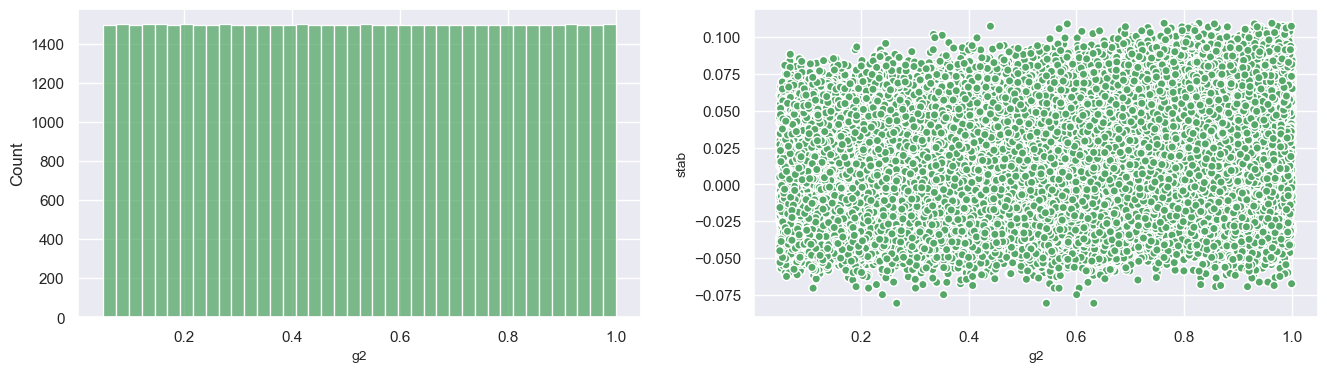

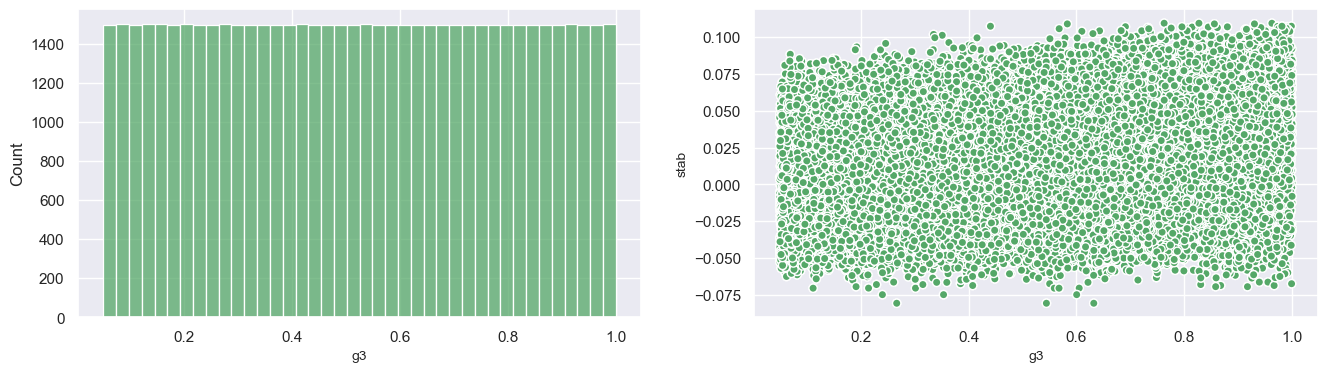

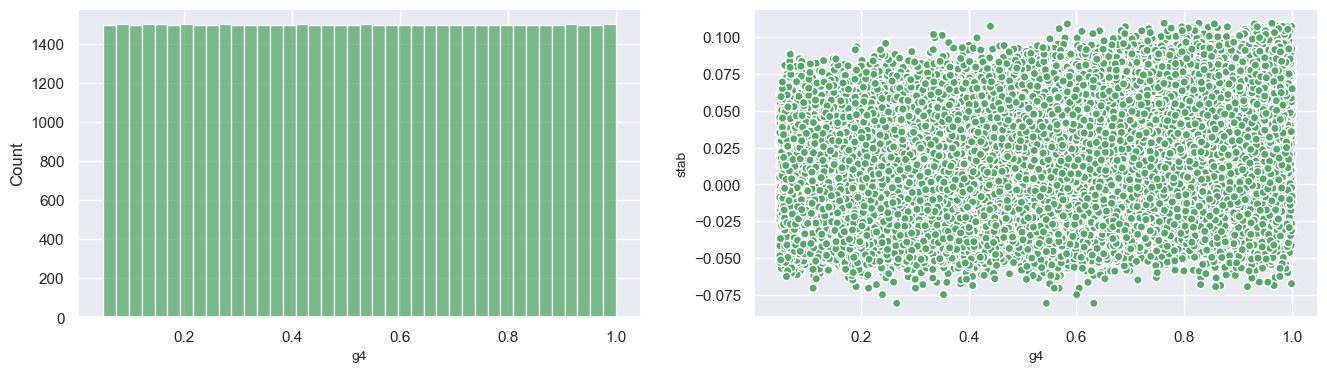

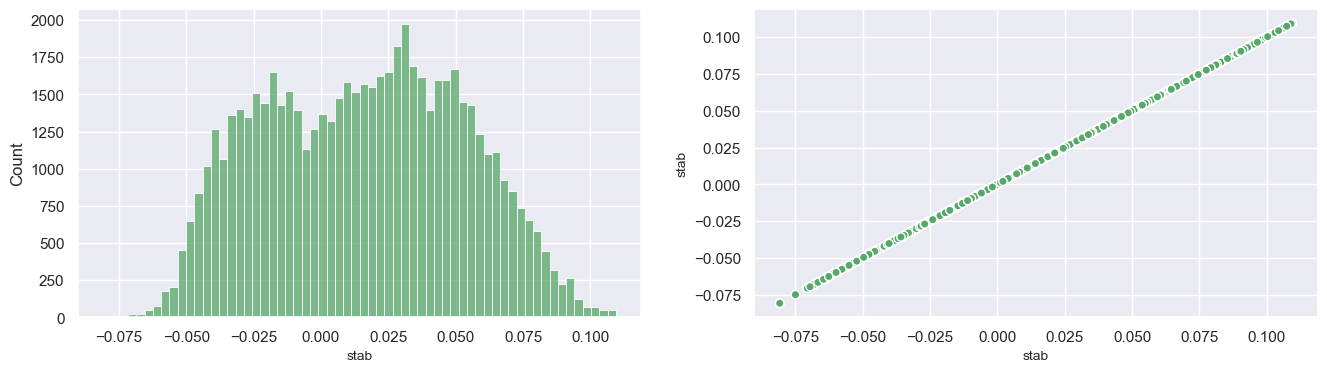

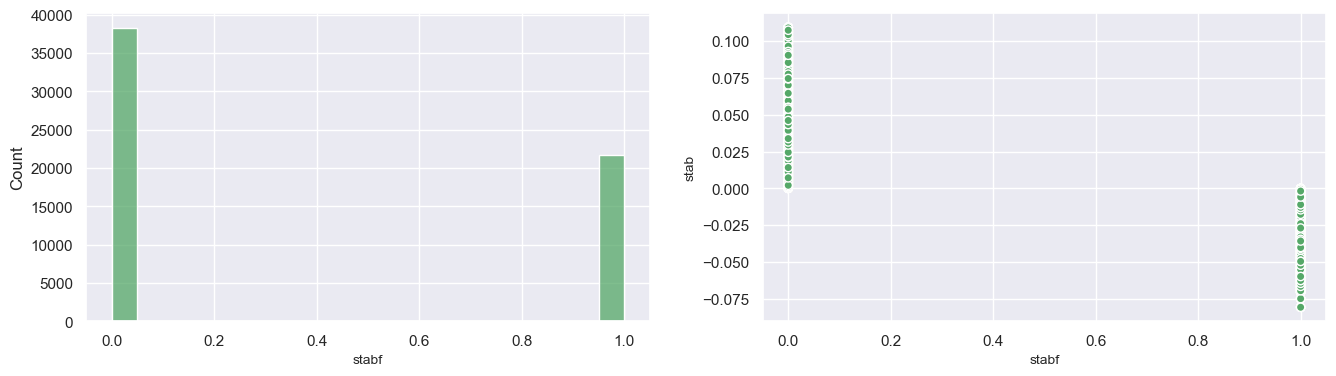

In [39]:
for column in data.columns:
    assessment(data, 'stab', column, 1)

In [40]:
data.p1.skew()

-0.012688423269883417

<p style="text-align: justify">The proportion of observations related to 'unstable' and 'stable' scenarios is mapped.</p>


In [41]:
print(f'Split of "unstable" (0) and "stable" (1) observations in the original dataset:')
print(data['stabf'].value_counts(normalize=True))

Split of "unstable" (0) and "stable" (1) observations in the original dataset:
stabf
0    0.638
1    0.362
Name: proportion, dtype: float64


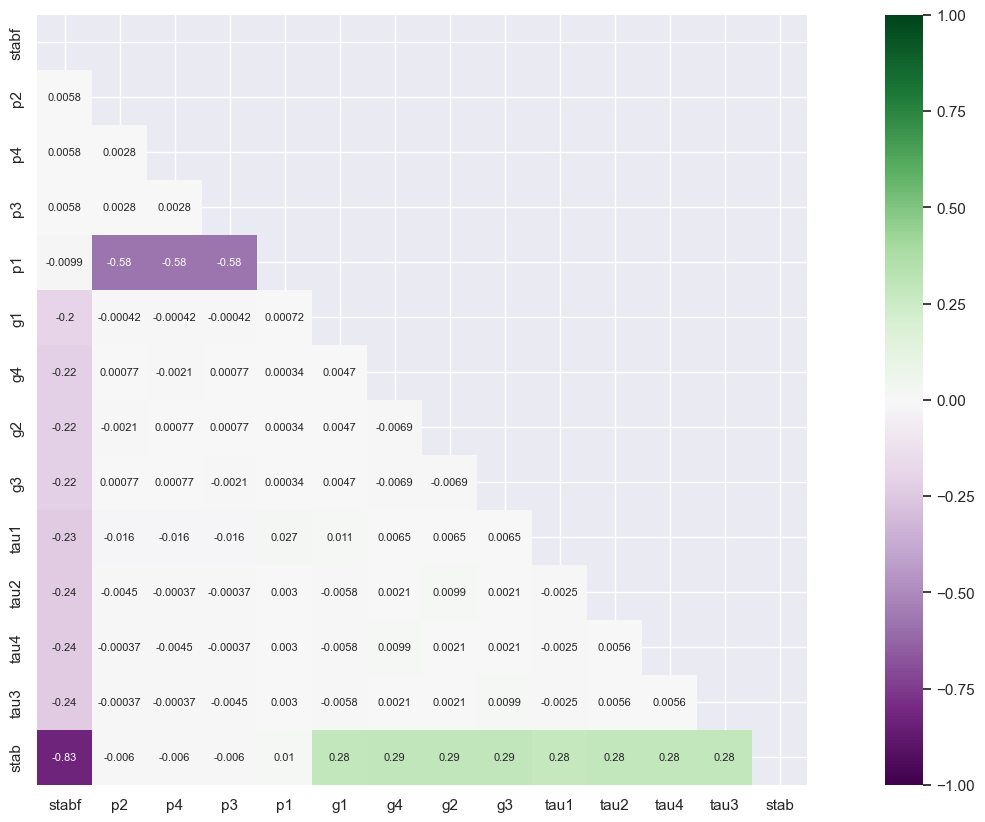

In [42]:
correlation_map(data, 'stabf', 14)

In [43]:
X = data.iloc[:, :12]
y = data.iloc[:, 13]

# Split the data into training and testing sets
X_training = X[:54000]
y_training = y[:54000]

X_testing = X[54000:]
y_testing = y[54000:]

# Calculate value counts normalized by the total number of occurrences
ratio_training = y_training.value_counts(normalize=True)
ratio_testing = y_testing.value_counts(normalize=True)

# Display the ratios
print("Training Set Ratios:\n", ratio_training)
print("Testing Set Ratios:\n", ratio_testing)


Training Set Ratios:
 stabf
0    0.637852
1    0.362148
Name: proportion, dtype: float64
Testing Set Ratios:
 stabf
0    0.639333
1    0.360667
Name: proportion, dtype: float64


In [44]:
X_training = X_training.values
y_training = y_training.values

X_testing = X_testing.values
y_testing = y_testing.values

In [45]:
scaler = StandardScaler()
X_training = scaler.fit_transform(X_training)
X_testing = scaler.transform(X_testing)

In [48]:
from keras.models import Sequential
from keras.layers import Dense

# Initialize the ANN
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(24, kernel_initializer='uniform', activation='relu', input_dim=12))

# Second hidden layer
model.add(Dense(24, kernel_initializer='uniform', activation='relu'))

# Third hidden layer
model.add(Dense(12, kernel_initializer='uniform', activation='relu'))

# Output layer
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 24)                  │             312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 12)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,225 (4.79 KB)

 Trainable params: 1,225 (4.79 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
from sklearn.model_selection import KFold

cross_val_round = 1
print('Model evaluation\n')

kf = KFold(n_splits=10, shuffle=True, random_state=10)

for train_index, val_index in kf.split(X_training):
    X_train, X_val = X_training[train_index], X_training[val_index]
    y_train, y_val = y_training[train_index], y_training[val_index]
    
    model.fit(X_train, y_train, epochs=50, verbose=0)
    loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
    
    print(f'Round {cross_val_round} - Loss: {loss:.4f} | Accuracy: {accuracy * 100:.2f}%')
    cross_val_round += 1


Model evaluation

Round 1 - Loss: 0.0664 | Accuracy: 97.22%
Round 2 - Loss: 0.0618 | Accuracy: 97.41%
Round 3 - Loss: 0.0600 | Accuracy: 97.81%
Round 4 - Loss: 0.0547 | Accuracy: 97.70%
Round 5 - Loss: 0.0479 | Accuracy: 97.87%
Round 6 - Loss: 0.0471 | Accuracy: 98.17%
Round 7 - Loss: 0.0430 | Accuracy: 98.35%
Round 8 - Loss: 0.0408 | Accuracy: 98.50%
Round 9 - Loss: 0.0356 | Accuracy: 98.67%
Round 10 - Loss: 0.0473 | Accuracy: 98.13%


In [50]:
y_pred = classifier.predict(X_testing)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step


In [51]:
cm = pd.DataFrame(data=confusion_matrix(y_testing, y_pred, labels=[0, 1]),
                  index=["Factual_Unstable", "Factual_Stable"],
                  columns=["Prediction_Unstable", "Prediction_Stable"])
cm

Prediction_Unstable  Prediction_Stable
Factual_Unstable                 3603                233
Factual_Stable                   2032                132

In [52]:
print(f'According to the confusion matrix, accuracy: {((cm.iloc[0, 0] + cm.iloc[1, 1]) / len(y_testing) * 100):.2f}%')

According to the confusion matrix, accuracy: 62.25%


In [53]:
end_time = datetime.now()

print('\nStart time', start_time)
print('End time', end_time)
print('Time elapsed', end_time - start_time)


Start time 2024-06-28 02:24:57.536321
End time 2024-06-28 02:43:45.261076
Time elapsed 0:18:47.724755
